In [7]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # Import the Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as pltco # A package to help with coloring plots
#[x for x in dir(list) if not '__' in x]

### Import Data Frame assign the name fifa
* Print out the head() or first 5 rows

In [8]:
fifa = pa.read_csv('https://www.dropbox.com/s/ov362sryogd0942/CompleteDataset.csv?dl=1', low_memory=False)

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,29,...,55,25,11,61,44,10,83,70,11,GK


### Fixing Bad Data
* Stripped "€" and "K" from Wage
* Stripped "+" and "-" from the front of the columns
* Removed any part of the String after "+" and "-" and convert columns to float

In [9]:
fifa['Wage'] = fifa['Wage'].map(lambda x: x.lstrip('€').rstrip('K'))

In [10]:
A = fifa["Age"] = fifa.Age.astype(float)
B = fifa["Overall"] = fifa.Overall.astype(float)
C = fifa["Wage"] = fifa.Wage.astype(float)
D = fifa["Potential"] = fifa.Potential.astype(float)

In [11]:
def removeStrings (X):
    if '+' in X:
        K = X.find('+')
        return X[:K]
    if '-' in X:
        K = X.find('-')
        return X[:K]
    else:  
        return X

In [12]:
def convertFloat(fifa, feature):
    for K in fifa.index: 
        fifa.loc[K,feature] = removeStrings(fifa.loc[K, feature])

    
    fifa.loc[:, feature] = fifa.loc[:,feature].astype("float")  
    return fifa

In [13]:
fifa = convertFloat(fifa, "Acceleration")
fifa = convertFloat(fifa, "Aggression")
fifa = convertFloat(fifa, "Agility")
fifa = convertFloat(fifa, "Balance")
fifa = convertFloat(fifa, "Ball control")

### Avalaible Columns
* Age, Overall, Potentail, Wage, Acceleration, Aggression, Agility, Balance, and Ball Control

* 
### Linear, Ridge, Lasso, KN, Decision Tree for our features of   Agility and Ball Control

* Sam Final Project

In [25]:
from sklearn.linear_model import Ridge

In [26]:
from sklearn.linear_model import Lasso

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:

import numpy.random as rn
def plot_reg_model(reg, X, y):

 

    n = X.shape[0]
    test = int(0.20*n)            
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       
    y_test = y[:test]
    X_train = X[test:]     
    y_train = y[test:]
    
    reg.fit(X_train, y_train) 
     
    nn = 200
    
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   
        np.linspace(y_min, y_max, nn))                    
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) 

  
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

# Agility and Overall to predict Wage

In [31]:
X = np.array(fifa[['Agility', 'Overall']])
y = np.array(fifa['Wage'])

### Linear

Training R2: 0.3592202075981039
Testing R2: 0.32723311859795445


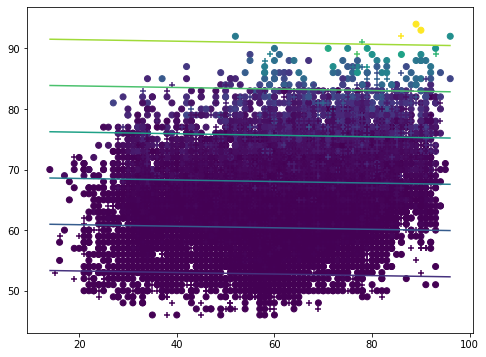

In [32]:
reg2 = LinearRegression()
plot_reg_model(reg2, X, y);

### Ridge

Training R2: 0.3503313635221097
Testing R2: 0.3649354661549835


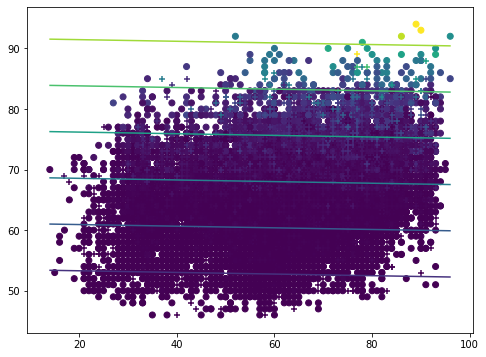

In [33]:
ridge2 = Ridge(alpha=2)
plot_reg_model(ridge2, X, y);

### Lasso

Training R2: 0.34685316580551406
Testing R2: 0.37600987345843895


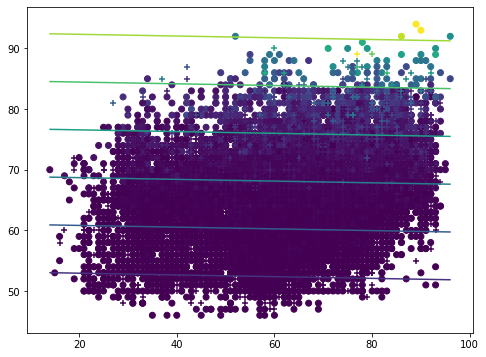

In [34]:
lasso2=Lasso(alpha=1)
plot_reg_model(lasso2, X, y);

### KNeighbors

Training R2: 0.7716273546846404
Testing R2: 0.7211630332440946


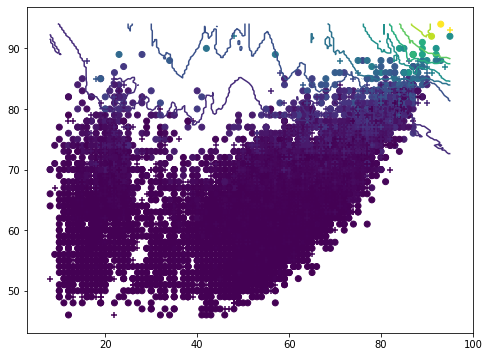

In [167]:
knn2 = KNeighborsRegressor(n_neighbors=10)
plot_reg_model(knn2, X, y);

### Decision Tree

Training R2: 0.7918380267624512
Testing R2: 0.7340996298850969


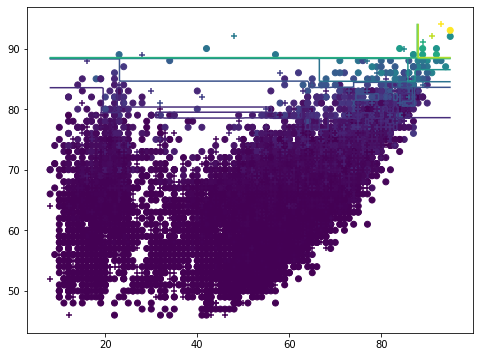

In [168]:
tree2 = DecisionTreeRegressor(min_samples_leaf=5)
plot_reg_model(tree2, X, y);

# Ball Control and Overall to Predict Wage

In [39]:
X = np.array(fifa[['Ball control', 'Overall']])
y = np.array(fifa['Wage'])

### Linear

Training R2: 0.3612572096627922
Testing R2: 0.3271967391831183


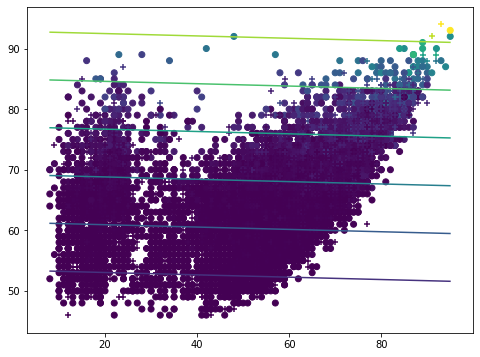

In [40]:
reg4 = LinearRegression()
plot_reg_model(reg4, X, y);

### Ridge

Training R2: 0.3525471690627685
Testing R2: 0.3568786878452572


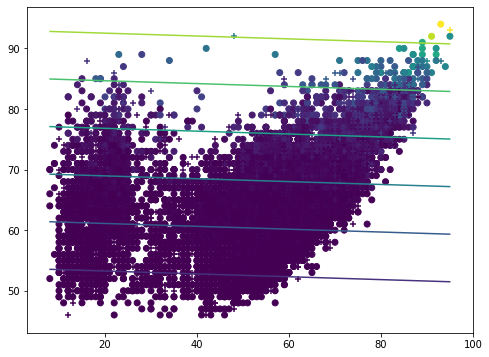

In [41]:
ridge4 = Ridge(alpha=2)
plot_reg_model(ridge4, X, y);

### Lasso

Training R2: 0.3570554214035764
Testing R2: 0.33725729738144783


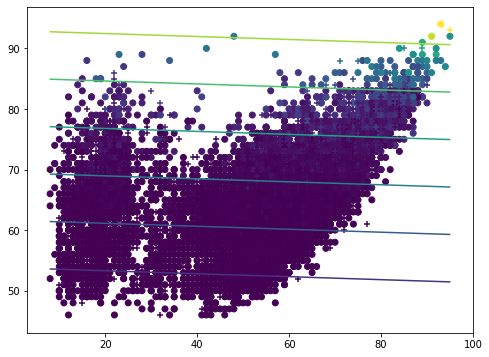

In [42]:
lasso4=Lasso(alpha=1)
plot_reg_model(lasso4, X, y);

### KNeighbors

Training R2: 0.7648930084961651
Testing R2: 0.7320064997395415


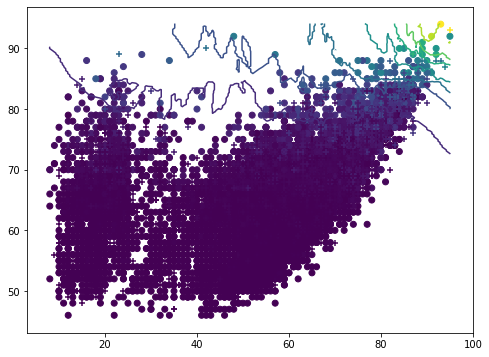

In [175]:
knn4 = KNeighborsRegressor(n_neighbors=10)
plot_reg_model(knn4, X, y);

### Decision Tree

Training R2: 0.7943542110967478
Testing R2: 0.725975507552646


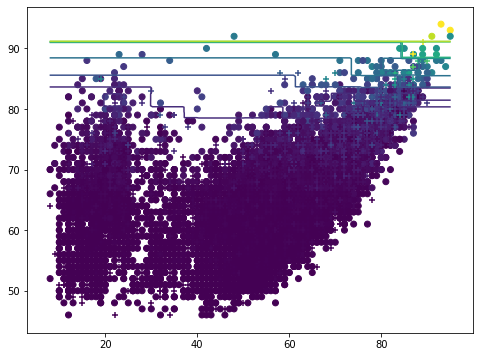

In [176]:
tree4 = DecisionTreeRegressor(min_samples_leaf=5)
plot_reg_model(tree4, X, y);